# Constrained Optimization

This section covers local *constrained* optimization. We will be using `scipy.optimize` module for minimizing an analytical function with constraints. Going through the following documentation will help in understanding the code:

1. [Scipy minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
2. [Matplotlib contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)
3. [Scipy nonlinear constraint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.NonlinearConstraint.html#scipy.optimize.NonlinearConstraint)

Below block of code imports all the required packages:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint

Consider the optimization problem described below:

$$
    \begin{aligned}
        \min_{x_1,x_2} \quad & x_1^2 - \frac{x_1}{2} - x_2 - 2 \\
        \textrm{subject to} \quad & x_1^2 -4x_1 + x_2 + 1  \leq 0 \\
        \quad & \frac{x_1^2}{2} + x_2^2 - x_1 - 4 \leq 0 \\
    \end{aligned}
$$

**Question**: Plot the objective function contour and $g_i=0$ curves.

**Answer**: Below block of code defines various functions. Read the comments to understand the code.

In [5]:
def f(x):
    """
        Function which calculates the function value at given x.
        
        Input:
        x - 1D/2D numpy array
    """

    # Number of dimensions of input
    dim = x.ndim

    # To ensure n x 2
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]
    
    y = x1**2 - x1/2 - x2 - 2

    y = y.reshape(-1,1)
    
    if dim == 1:
        y = y.reshape(-1,)
    
    return y

def g1(x):
    """
        Function which calculates the g1 value at given x.
        
        Input:
        x - 1D/2D numpy array
    """

    # Number of dimensions of input
    dim = x.ndim

    # To ensure n x 2
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]
    
    g1 = x1**2 - 4*x1 + x2 + 1

    g1 = g1.reshape(-1,1)
    
    if dim == 1:
        g1 = g1.reshape(-1,)
    
    return g1

def g2(x):
    """
        Function which calculates the g2 value at given x.
        
        Input:
        x - 1D/2D numpy array
    """

    # Number of dimensions of input
    dim = x.ndim

    # To ensure n x 2
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]
    
    g2 = x1**2 / 2 + x2**2 - x1 - 4

    g2 = g2.reshape(-1,1)
    
    if dim == 1:
        g2 = g2.reshape(-1,)
    
    return g2

def plot_prob():
    """
        Function which plots the function contour and constraints
    """

    num_points = 100

    # Defining x and y values
    x = np.linspace(-3,5,num_points)
    y = np.linspace(-3,4,num_points)

    # Creating a mesh at which values and 
    # gradient will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    obj = f(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)
    const1 = g1(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)
    const2 = g2(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    # Plotting the filled contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, obj, levels=30)
    fig.colorbar(CS, orientation='vertical')

    # Plotting g1
    ax.contour(X, Y, const1, levels=[0], colors="k")
    ax.contourf(X, Y, const1, levels=np.linspace(0,const1.max()), colors="white", alpha=0.3, antialiased = True)
    ax.annotate('g1', xy =(3.1, 2.0))
 
    # Plotting g2
    ax.contour(X, Y, const2, levels=[0], colors="k")
    ax.contourf(X, Y, const2, levels=np.linspace(0,const2.max()), colors="white", alpha=0.3, antialiased = True)
    ax.annotate('g2', xy =(0.0, 2.2))

    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)

    # Few annotations
    ax.annotate('A', xy =(-0.1, -1.8), c='r', fontweight='bold')
    ax.annotate('B', xy =(1.0, 1.8), c='r', fontweight='bold')
    ax.annotate('C', xy =(3.0, 1.2), c='r', fontweight='bold')
    ax.annotate('D', xy =(3.5, -0.6), c='r', fontweight='bold')

    return ax

Below block of code makes a contour plot of the objective with constraints using the functions defined in previous block:

<Axes: xlabel='$x_1$', ylabel='$x_2$'>

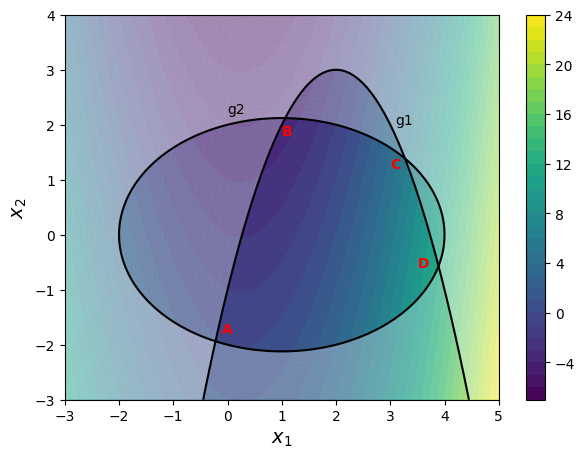

In [6]:
plot_prob()

The black curves denote $g_i=0$ and the region ABCDA is **feasible**, remaining design space (white masked region) is infeasible.

## Penalty method:

The goal of penalty methods is to convert a constrained optimization problem into an unconstrained optimization problem by adding a penalty term to the objective function. This penalty term makes objective function larger when the constraints are violated, otherwise penalty is zero. There are many ways to implement penalty function but we will use **quadratic penalty function** here. Optimization problem statement will be transformed to:

$$
    \begin{aligned}
        \min_{x_1,x_2} \quad & f(x_1,x_2) + \lambda _1 \frac{[\max(g_1(x_1,x_2),0)]^2}{2} + \lambda _2 \frac{[\max(g_2(x_1,x_2),0)]^2}{2} \\
        \text{where} \quad & f(x_1, x_2) = x_1^2 - \frac{x_1}{2} - x_2 - 2 \\
        \quad & g_1(x_1, x_2) = x_1^2 -4x_1 + x_2 + 1 \\
        \quad & g_2(x_1, x_2) = \frac{x_1^2}{2} + x_2^2 - x_1 - 4
    \end{aligned}
$$

So, the second and third term will be zero when the constraints are satisfied. Otherwise, the penalty term will be positive and will increase the objective function value. Now, the problem is unconstrained and we can use methods like `BFGS` or `Conjugate Gradient` to solve the above problem.

Below block of code defines various functions which are used during the optimization. Read comments in the function for more details.

In [7]:
def callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value.
        
        Input: Current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(f(x))
    history["g1"].append(g1(x))
    history["g2"].append(g2(x))
    
def opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dict which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A str which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1

    # Plotting the convergence history
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax.plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax.plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax.plot(np.arange(num_itr+1), history["g1"], "k--", marker=".", label="$g_1$")
    ax.plot(np.arange(num_itr+1), history["g2"], "g--", marker=".", label="$g_2$")
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_xlim(left=0, right=num_itr)
    ax.set_ylabel("Quantities", fontsize=14)
    ax.grid()
    ax.legend(fontsize=12)
    ax.set_title("Convergence history - " + method, fontsize=14)

    # Plotting function contours
    ax = plot_prob()

    # PLotting other things
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.scatter(history["x1"][0], history["x2"][0], label="Starting point", c="red")
    ax.scatter(history["x1"][-1], history["x2"][-1], label="Final point", c="orange")
    ax.legend(loc='upper left')


Below block of code defines a function which returns penalized objective function value.

In [13]:
def penalized_obj(x):
    """
        Function for evaluating penalized objective.
    """
    
    # Compute objective and constraints
    obj = f(x)
    const1 = g1(x)
    const2 = g2(x)
    
    # Penalty multipliers
    p1 = 100
    p2 = 100
    
    # Returns quadratic penalized function
    return obj + p1 * max(const1,0)**2 / 2 + p2 * max(const2,0)**2 / 2

> **_NOTE:_** The penalty parameters $\lambda_1$ and $\lambda_2$ are kept constant here, but they can be updated during the optimization process to improve the convergence.

Below block of code defines various parameters for optimization using BFGS method.

Optimization terminated successfully.
         Current function value: -3.527135
         Iterations: 25
         Function evaluations: 335
         Gradient evaluations: 67


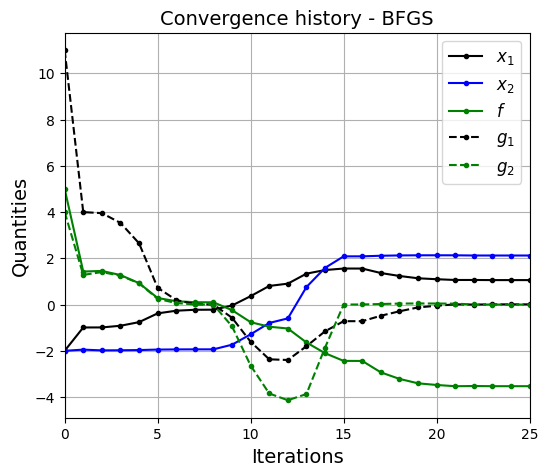

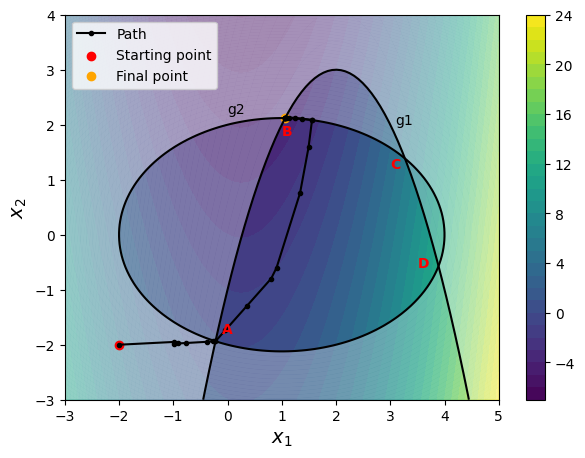

In [9]:
# Starting point
x0 = np.array([-2.0, -2.0])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"]= [f(x0)]
history["g1"] = [g1(x0)]
history["g2"] = [g2(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=penalized_obj, x0=x0, method=method, jac=jac, 
                  callback=callback, options=options)

# Convergence plots
opt_plots(history, method=method)

By using the penalty method, you can reach the optimum while satisfying the constraints. Optimum point lies at the intersection of both the constraints (which makes both the constraints active). It is recommended to change optimization parameters (such as starting point, penalty multiplier, etc.) and see how the solution changes.

**Question**: Use SLSQP method for solving the original constrained optimization problem.

**Answer**: Below block of code defines various parameters for optimization using **SLSQP** method:

Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.523406546437449
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7
Value of x1 at optimum: 1.0623763071639867
Value of x2 at optimum: 2.120861810878845
Value of g1 at optimum: [2.46287879e-10]
Value of g2 at optimum: [2.22692002e-07]


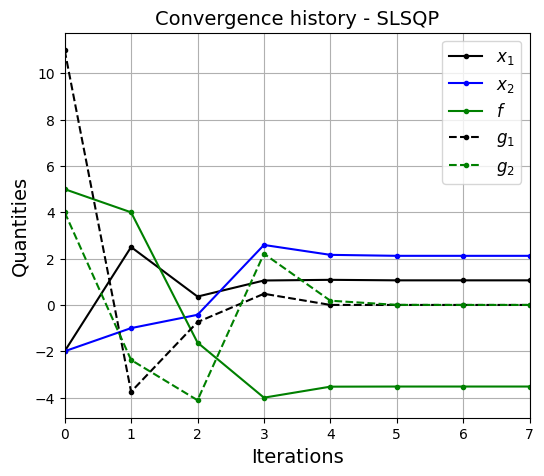

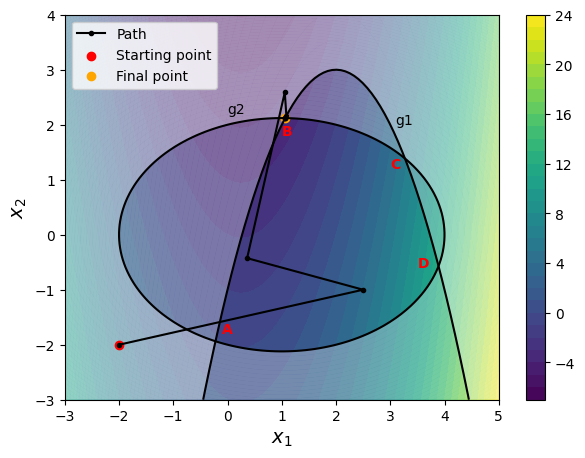

In [12]:
# Starting point
x0 = np.array([-2.0, -2.0])

# Solver
method = "SLSQP"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [f(x0)]
history["g1"] = [g1(x0)]
history["g2"] = [g2(x0)]

# Solver options
options ={
    "disp": True
}

# Setting constraints - optimizer needs a list of Nonlinear constraints objects
# Read the documentation for more details.
constraints = [NonlinearConstraint(g1, -np.inf, 0),
               NonlinearConstraint(g2, -np.inf, 0)]

# Minimize the function
result = minimize(fun=f, x0=x0, method=method, jac=jac, 
                  constraints=constraints, callback=callback, 
                  options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))
print("Value of g1 at optimum: {}".format(g1(result.x)))
print("Value of g2 at optimum: {}".format(g2(result.x)))

# Convergence plots
opt_plots(history, method=method)

`SLSQP` reaches the same optimum as penalty method but with much less number of iterations (and function evaluations). It is specifically designed for constrained optimization and uses Sequential Least SQuares Programming approach and uses gradient information of objective and constraints. It is recommended to use SQP based methods for constrained optimization. `SLSQP` method is very sensitive to the starting point. Try changing the starting point and see how the optimization path changes.

> **_NOTE:_** Contour is only plotted for $x_1 \in [-3,5]$ and $x_2 \in [-3,4]$. But *the optimization process is not bounded by this range*, it can go beyond this range. For example, try (4,4) as the starting point and you will see that the optimization process goes beyond the range of contour plot. Unlike `BFGS` or `Conjugate Gradient` method, `SLSQP` CAN handle bounds. You can use `bounds` argument in minimize function to define bounds. This is very useful when you want to limit the search space.